# Data Sci Eng Methods 
## Assignment 2 – Zomato_EDA

*ML Data Cleaning and Feature Selection*


# Abstract

Zomato is an Indian multinational restaurant aggregator and food delivery company. 

Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. 
This dataset is comprised of information of food restraunts in Banglaore working with Zomato.

Reference: https://www.kaggle.com/datasets/pranavuikey/zomato-eda

The aim of the Notebook is to create predictive models in AutoML and interpret them:
* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

_________________________________________________________
###Getting our data

This dataset contains 51717 data values which is above GitHub's threshold of .csv files. Accordingly, we pull in the kaggle dataset directly using the kaggle library and my kaggle credentials.

In [1]:
#installing dependencies
!pip install eli5
! pip install -q kaggle
#installing h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
#importing all necessary libraries
%matplotlib inline  
import random, os, sys
import h2o
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import math

In [3]:
#making a directory for kaggle api
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (3).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
#downloading and reading the zomato dataset
! kaggle datasets list -s zomato # searching through kaggle with keyword 'zomato'
! kaggle datasets download -d pranavuikey/zomato-eda
!unzip zomato-eda.zip

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                  Zomato Bangalore Restaurants                        89MB  2019-03-31 09:48:43          46394       1163  1.0              
shrutimehta/zomato-restaurants-data                          Zomato Restaurants Data                              5MB  2018-03-13 04:56:25          44543        620  0.7941176        
batjoker/zomato-restaurants-hyderabad                        Zomato Restaurants Hyderabad                         1MB  2020-06-08 15:11:39           3122         62  1.0              
rishikeshkonapure/zomato                                     Zomato             

In [88]:
#Viewing data in the file 
data = pd.read_csv("zomato.csv")
data.shape
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Additionally, I have sampled a 2000 random points as an alternative for a local file and commented out the code to change the input to that file

In [ ]:
#data = pd.read_csv('zomatoSample.csv')

#Cleaning Up Data


We must clean the dataset for this assignment to prevent any errors that would limit the full potential of AutoML.

###Dropping columns 

The columns phone, dish_liked, url, menu_item, and reviews_list help identify the restaurant but do not add characteristics to the dataset so we can drop them. 

In [6]:
data.drop(['url','address','phone','menu_item','dish_liked','reviews_list',"listed_in(city)"],axis = 1,inplace=True)
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


#### Renaming Column Headers
To better understand the data, let's first rename our column headers with appropriate units and descripter language. 

In [7]:
data.rename(columns={'name':'Restaurant','online_order': 'Online Ordering?', 'book_table':'Reservation Needed?','votes': 'Number of Votes','location':'City','rest_type': 'Restaurant Type', 'cuisines': 'Cuisines','rate':'Rating','approx_cost(for two people)':'Cost(Rupees)','listed_in(type)':'Meal Type'},inplace=True)
data.head(3)

,Restaurant,Online Ordering?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost(Rupees),Meal Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


###Missing Data

Imputing Missing Data:
We have three methods for imputing missing data. Using the median, dropping, and using machine learning. 

In [8]:
missing_list = data.columns[data.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(data[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / data.shape[0]) * 100
Missing_DF

,Missing_Column,Missing_Values,%_Missing
0,Rating,7775,15.033741
1,City,21,0.040606
2,Restaurant Type,227,0.438927
3,Cuisines,45,0.087012
4,Cost(Rupees),346,0.669026


We see that most of our missing data is Rating. The median method in this case would not make sense for null values because rating for a restaurant should not be effected by the rest of the data. For example, a new restaurant that did not get the chance pass the inspection exam with rating "NEW" should not be replaced by a 3 star rating when there is an equal chance the restaurant could be of lower or higher quality. We could potentially explore Machine Learning but for the purposes of the training data we can justify using the dropping method for columns that are missing 5% or less of data since it is a very small percentage of missing data.
Note: I chose to drop NaN but other notebooks chose to use the mean to replace empty values.

In [9]:
data = data.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           30958 non-null  object
 1   Online Ordering?     30958 non-null  object
 2   Reservation Needed?  30958 non-null  object
 3   Rating               30958 non-null  object
 4   Number of Votes      30958 non-null  int64 
 5   City                 30958 non-null  object
 6   Restaurant Type      30958 non-null  object
 7   Cuisines             30958 non-null  object
 8   Cost(Rupees)         30958 non-null  object
 9   Meal Type            30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


In [10]:
data.isnull().sum()

Restaurant             0
Online Ordering?       0
Reservation Needed?    0
Rating                 0
Number of Votes        0
City                   0
Restaurant Type        0
Cuisines               0
Cost(Rupees)           0
Meal Type              0
dtype: int64

#### Remove Duplicates
In case we have any duplicated rows, we remove duplicates. This is ensure there is no bias with repeating restaurants.

In [11]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           30958 non-null  object
 1   Online Ordering?     30958 non-null  object
 2   Reservation Needed?  30958 non-null  object
 3   Rating               30958 non-null  object
 4   Number of Votes      30958 non-null  int64 
 5   City                 30958 non-null  object
 6   Restaurant Type      30958 non-null  object
 7   Cuisines             30958 non-null  object
 8   Cost(Rupees)         30958 non-null  object
 9   Meal Type            30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


### Clean up individual columns
Finally, we should check each variable and clean out data that does not make sense. This can either mean standardizing what "null" means in that context or removing random characters from changing data formats from object to integer



##### *Rating*

In [12]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

By displaying all unique values from the Rating column, we see that some entries contain "NEW", "nan", and "-" representing no ratings. We can standardize empty values to be nan. We also see that the Rating field contains strings of a floating number out of 5. To prepare for analyzing our data, we will extract the rating, setting the variable to be of type float. 

In [13]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['Rating']=data['Rating'].apply(clean)
data['Rating'].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           30958 non-null  object 
 1   Online Ordering?     30958 non-null  object 
 2   Reservation Needed?  30958 non-null  object 
 3   Rating               29638 non-null  float64
 4   Number of Votes      30958 non-null  int64  
 5   City                 30958 non-null  object 
 6   Restaurant Type      30958 non-null  object 
 7   Cuisines             30958 non-null  object 
 8   Cost(Rupees)         30958 non-null  object 
 9   Meal Type            30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [14]:
data = data.dropna(subset=["Rating"])
data['Rating'] = [round(x) for x in data['Rating']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
data['Rating'].unique()

array([4, 5, 3, 2])

##### *Location*


In [16]:
data['City'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [17]:
data['City'].value_counts(ascending=False)

BTM                      2100
Indiranagar              1583
Koramangala 5th Block    1554
Whitefield               1537
HSR                      1480
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: City, Length: 92, dtype: int64

Looking at the breakdown of cities we see no typos or errors and can proceed.

##### *Cost*


In [18]:
data['Cost(Rupees)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

Examining the unique values of Cost, we can see that the cost is stored as text with type object. We can correct the type to integer so that we can later model the variables.





In [19]:
data = data.dropna()

In [20]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

data['Cost(Rupees)']=data['Cost(Rupees)'].apply(money)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Restaurant           29638 non-null  object
 1   Online Ordering?     29638 non-null  object
 2   Reservation Needed?  29638 non-null  object
 3   Rating               29638 non-null  int64 
 4   Number of Votes      29638 non-null  int64 
 5   City                 29638 non-null  object
 6   Restaurant Type      29638 non-null  object
 7   Cuisines             29638 non-null  object
 8   Cost(Rupees)         29638 non-null  int64 
 9   Meal Type            29638 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.5+ MB


##### *Booking*


In [22]:
data['Reservation Needed?'].unique()

array(['Yes', 'No'], dtype=object)

Booking has no typos so we can proceed.

##### *Online Order*


In [23]:
data['Online Ordering?'].unique()

array(['Yes', 'No'], dtype=object)

Online Ordering has no typos so we can proceed.

##### *Restaurant Type*


In [24]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [25]:
data['Restaurant Type'].value_counts(ascending=False)

Quick Bites                   9492
Casual Dining                 7151
Cafe                          2420
Dessert Parlor                1309
Delivery                      1054
                              ... 
Bakery, Food Court               2
Food Court, Beverage Shop        2
Bakery, Beverage Shop            1
Quick Bites, Kiosk               1
Dessert Parlor, Food Court       1
Name: Restaurant Type, Length: 87, dtype: int64

The Restaurant type has lots of values with multiple values for one restaurant. We can simplify the types to general group for better analysis.

In [26]:
def typeSimplify(value):
    value = str(value)
    if 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value:
        return 'Dessert'
    elif 'Quick Bites' in value:
      return 'Quick Bites'
    elif 'Bar' in value or 'Microbrewery' in value:
      return 'Bar'
    elif 'Bakery' in value:
      return 'Bakery'
    elif 'Casual Dining' in value:
      return 'Casual Dining'
    elif 'Fine Dining' in value:
      return 'Fine Dining'
    elif 'Food Court' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value:
      return 'North Indian'
    elif 'South Indian' in value:
      return 'South Indian'
    else:
        return value
    
data['Restaurant Type']=data['Restaurant Type'].apply(typeSimplify)
data['Restaurant Type'].head(10)

0    Casual Dining
1    Casual Dining
2    Casual Dining
3      Quick Bites
4    Casual Dining
5    Casual Dining
6    Casual Dining
7    Casual Dining
8             Cafe
9             Cafe
Name: Restaurant Type, dtype: object

In [27]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Quick Bites', 'Cafe', 'Delivery', 'Mess',
       'Dessert', 'Pub', 'Bakery', 'Takeaway, Delivery', 'Fine Dining',
       'Beverage Shop', 'Bar', 'Kiosk', 'Food Truck', 'Takeaway',
       'Lounge', 'Street Food', 'Dhaba', 'Club', 'Bhojanalya'],
      dtype=object)

In [28]:
data['Restaurant Type'].isnull().sum()

0

##### *Meal Type*


In [29]:
data['Meal Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [30]:
data['Meal Type'].value_counts()

Delivery              13504
Dine-out              10867
Desserts               2031
Cafes                  1136
Drinks & nightlife      877
Buffet                  655
Pubs and bars           568
Name: Meal Type, dtype: int64

Meal Type has no typos so we can proceed.

##### *Cuisines*


In [31]:
data['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [32]:
data['Cuisines'].value_counts()

North Indian                                1518
North Indian, Chinese                       1339
South Indian                                 851
Bakery, Desserts                             455
Biryani                                      410
                                            ... 
South Indian, Mangalorean, Chinese             1
Fast Food, Andhra                              1
Kerala, Biryani, North Indian, Chettinad       1
North Indian, Street Food, Fast Food           1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2367, dtype: int64

Cuisines have multiple values for one restaurant with repeating keywords but they show has different categories. We can simplify this to general groups for better analysis. 

In [33]:
data['Cuisines'].isnull().sum()

0

In [34]:
def cuisineSimplify(value):
    value = str(value)
    if 'Italian' in value or 'Pizza' in value:
        return 'Italian'
    elif 'African' in value:
      return 'African'
    elif 'Continental' in value:
      return 'Continental'
    elif "Mughlai" in value or 'Middle Eastern' in value or 'Biryani' in value or 'Arabian' in value or 'Turkish' in value:
      return 'Middle Eastern'
    elif 'Burger' in value or 'American' in value or 'Salad' in value or 'Sandwich' in value:
      return 'American'
    elif 'Indian' in value and 'Chinese' in value:
      return 'Asian Fusion'
    elif 'Thai' in value or 'Japanese' in value or 'Asian' in value or 'Chinese' in value or 'Tibetan' in value or 'Momo' in value:
      return 'Asian'
    elif 'Mexican' in value:
      return 'Mexican'
    elif 'Street Food' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value or 'Rajasthani' in value or "Gujarati" in value or 'Bengali' in value:
      return 'North Indian'
    elif 'South Indian' in value or 'Kerala' in value or 'Bengali' in value or 'Andhra' in value or 'Maharashtrian':
      return 'South Indian'
    elif 'Mediterranean' in value:
      return 'Mediterranean'
    elif 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value or 'Mithai' in value:
      return 'Dessert'
    elif 'Cafe' in value:
      return 'Cafe'
    else:
        return value
    
data['Cuisines']=data['Cuisines'].apply(cuisineSimplify)
data['Cuisines'].head(10)


0    Middle Eastern
1      Asian Fusion
2           Italian
3      North Indian
4      North Indian
5      North Indian
6      Asian Fusion
7           Italian
8           Italian
9           Italian
Name: Cuisines, dtype: object

In [35]:
data['Cuisines'].unique()

array(['Middle Eastern', 'Asian Fusion', 'Italian', 'North Indian',
       'Cafe', 'Continental', 'Fast Food', 'American', 'South Indian',
       'Asian', 'Street Food', 'African', 'Mexican'], dtype=object)

##### *Restaurant*

In [36]:
data.drop(['Restaurant'],axis = 1,inplace=True)

##### *Number of Votes*

In [37]:
data = data.dropna(subset=['Number of Votes'])

In [38]:
data['Number of Votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [39]:
ALOT = 1e6
data['Number of Votes'] = [max(min(x, ALOT), -ALOT) for x in data['Number of Votes']]

# Data transforming, Feature creation and Analysis

In [40]:
data = data.dropna()

In [41]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Online Ordering?     29638 non-null  object
 1   Reservation Needed?  29638 non-null  object
 2   Rating               29638 non-null  int64 
 3   Number of Votes      29638 non-null  int64 
 4   City                 29638 non-null  object
 5   Restaurant Type      29638 non-null  object
 6   Cuisines             29638 non-null  object
 7   Cost(Rupees)         29638 non-null  int64 
 8   Meal Type            29638 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.3+ MB


In [43]:
data_clean = data #making a copy so we don't lose all that progress!

###Now, let's take a quick look at our data!

Based on the QQ Plots for the numeric variables, we see that the data is skewed and non-linear. We can predict that in AutoML, we are less likely to see linear models.

<Figure size 576x360 with 0 Axes>

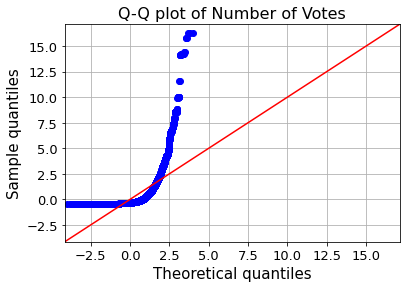

<Figure size 576x360 with 0 Axes>

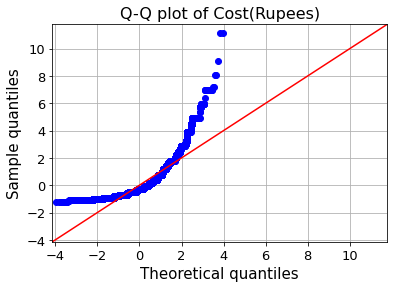

In [44]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_temp=data_clean[['Number of Votes', 'Cost(Rupees)']]
for c in data_temp.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_temp[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [45]:
print("Skewness of Votes: %f" % data_clean['Number of Votes'].skew())
print("Kurtosis of Votes: %f" % data_clean['Number of Votes'].kurt())
print("Skewness of Cost: %f" % data_clean['Cost(Rupees)'].skew())
print("Kurtosis of Cost: %f" % data_clean['Cost(Rupees)'].kurt())

Skewness of Votes: 6.156129
Kurtosis of Votes: 57.959362
Skewness of Cost: 2.259205
Kurtosis of Cost: 7.984325


Now let's examine the distribution of the categorical variables. First, we must normalize the data and add dummy variables for testing.

In [46]:
data_norm = data_clean

In [47]:
data_norm['Reservation Needed?'] = data_norm['Reservation Needed?'].map({'Yes': 1, 'No': 0})

In [48]:
data_norm['Online Ordering?'] = data_norm['Online Ordering?'].map({'Yes': 1, 'No': 0})

In [49]:
#Creating binary vaiables for Categorical Cols
data_norm = pd.get_dummies(data_norm)

**In the multivariate models are predictor variables independent of all the other predictor variables? Is there any multicollinearity in the model? **

In [51]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = data_norm.columns
vif["vif_Factor"] = [variance_inflation_factor(data_norm.values, i) for i in range(data_norm.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Online Ordering?,1.216204
1,Reservation Needed?,1.976864
2,Rating,1.267170
3,Number of Votes,1.409208
4,Cost(Rupees),4.216829
...,...,...
132,Meal Type_Delivery,inf
133,Meal Type_Desserts,inf
134,Meal Type_Dine-out,inf
135,Meal Type_Drinks & nightlife,inf


It is usually considered to be highly correlated if the VIF value is higher than 5. None of the values we were looking at show a VIF value of 5 so we can assume there is no multicollinearly. 

**Is the relationship significant?**

In [52]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

y = data_norm['Rating']
x = data_norm.drop('Rating', axis=1)

model = sm.OLS(y, x, axis =1).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     59.72
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        04:33:21   Log-Likelihood:                -17275.
No. Observations:               29638   AIC:                         3.482e+04
Df Residuals:                   29505   BIC:                         3.592e+04
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Online Ordering?                       0.1230      0.006     21.272      0.000       0.112       0.134
Reservation Needed?                    0.1189      0.009     12.894      0.000       0.101       0.137
Number of Votes                     9.211e-05   2.92e-06     31.493      0.000    8.64e-05    9.78e-05
Cost(Rupees)                           0.0001   1.07e-05     13.720      0.000       0.000       0.000
City_BTM                               0.1961      0.014     13.796      0.000       0.168       0.224
City_Banashankari                      0.2010      0.023      8.929      0.000       0.157       0.245
City_Banaswadi                         0.0956      0.026      3.679      0.000       0.045       0.147
City_Bannerghatta Road                 0.0471      0.018      2.593      0.010       0.012       0.083
City_Basavanagudi                      0.2184      0.024      9.102      0.000       0.171       0.265
City_Basaveshwara Nagar                0.2035      0.040      5.097      0.000       0.125       0.282
City_Bellandur                         0.0533      0.018      3.037      0.002       0.019       0.088
City_Bommanahalli                     -0.2508      0.042     -6.013      0.000      -0.333      -0.169
City_Brigade Road                      0.1441      0.020      7.129      0.000       0.104       0.184
City_Brookefield                       0.0771      0.022      3.561      0.000       0.035       0.120
City_CV Raman Nagar                    0.0031      0.057      0.055      0.956      -0.108       0.114
City_Central Bangalore                 0.3394      0.197      1.724      0.085      -0.046       0.725
City_Church Street                     0.2014      0.023      8.602      0.000       0.156       0.247
City_City Market                       0.2397      0.060      4.025      0.000       0.123       0.356
City_Commercial Street                 0.1630      0.038      4.296      0.000       0.089       0.237
City_Cunningham Road                   0.2844      0.028     10.202      0.000       0.230       0.339
City_Domlur                           -0.0016      0.027     -0.062      0.951      -0.054       0.051
City_East Bangalore                    0.0780      0.094      0.831      0.406      -0.106       0.262
City_Ejipura                           0.0922      0.043      2.134      0.033       0.008       0.177
City_Electronic City                   0.0401      0.018      2.178      0.029       0.004       0.076
City_Frazer Town                       0.2149      0.024      8.902      0.000       0.168       0.262
City_HBR Layout                        0.1707      0.053      3.249      0.001       0.068       0.274
City_HSR                               0.1935      0.015     12.539      0.000       0.163      

According to the low p-value and high t-statistic for a majority of the data, we can say that the relationship between rating and the number of votes,cost, and need for reservation is significant in addition to other categorical variables. We will further drill down which fields are exactly useful in predicing ratings in a cleaner way with AutoML



# Building the Model

##Initializing H2O


We must first install H2O and start the software.

In [53]:
min_mem_size=6 
run_time=333

In [54]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [55]:
#installing dependencies
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprp155axi
  JVM stdout: /tmp/tmprp155axi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprp155axi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_np7spt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [57]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [58]:
#Viewing data 
data = h2o.H2OFrame(data_clean)
data.shape
data.describe()
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:29638
Cols:9

,Online Ordering?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost(Rupees),Meal Type
type,int,int,int,int,enum,enum,enum,int,enum
mins,0.0,0.0,2.0,0.0,,,,40.0,
mean,0.648019434509751,0.17929684864025913,3.7513664889668608,425.3797827113847,,,,634.0447398609892,
maxs,1.0,1.0,5.0,16832.0,,,,6000.0,
sigma,0.4775960041068574,0.3836071607362359,0.48789440532137324,1007.2929150656364,,,,480.9124985000013,
zeros,10432,24324,0,19,,,,0,
missing,0,0,0,0,0,0,0,0,0
0,1.0,1.0,4.0,775.0,Banashankari,Casual Dining,Middle Eastern,800.0,Buffet
1,1.0,0.0,4.0,787.0,Banashankari,Casual Dining,Asian Fusion,800.0,Buffet
2,1.0,0.0,4.0,918.0,Banashankari,Casual Dining,Italian,800.0,Buffet


Online Ordering?,Reservation Needed?,Rating,Number of Votes,City,Restaurant Type,Cuisines,Cost(Rupees),Meal Type
1,1,4,775,Banashankari,Casual Dining,Middle Eastern,800,Buffet
1,0,4,787,Banashankari,Casual Dining,Asian Fusion,800,Buffet
1,0,4,918,Banashankari,Casual Dining,Italian,800,Buffet
0,0,4,88,Banashankari,Quick Bites,North Indian,300,Buffet
0,0,4,166,Basavanagudi,Casual Dining,North Indian,600,Buffet
1,0,4,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
0,0,4,8,Mysore Road,Casual Dining,Asian Fusion,800,Buffet
1,1,5,2556,Banashankari,Casual Dining,Italian,600,Cafes
1,0,4,324,Banashankari,Cafe,Italian,700,Cafes
1,0,4,504,Banashankari,Cafe,Italian,550,Cafes


##Predicting Rating

Now that we have initialized H2O with the zomato dataset, should first split the values into training and test datasets for verification.

In [59]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [60]:
# assign target and inputs for logistic regression
y = 'Rating'
X = [name for name in train.columns if name != y]
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
print(y)
print(X)

Rating
['Online Ordering?', 'Reservation Needed?', 'Number of Votes', 'City', 'Restaurant Type', 'Cuisines', 'Cost(Rupees)', 'Meal Type']


In [61]:
aml = H2OAutoML(max_runtime_secs=run_time,exclude_algos = ['DeepLearning'])

Using AutoML, pass in training and testing datasets as well as the predictor values to predict Rating.

In [62]:
aml.train(x=X,y=y,training_frame=train, validation_frame=test)  # Change training_frame=train

AutoML progress: |
04:33:44.421: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

██████████████████
04:35:19.88: GLM_1_AutoML_1_20221108_43344 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 135 out of bounds for length 135

█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20221108_43344

No summary for this model

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03444360551132063
RMSE: 0.18558988526134884
LogLoss: 0.1340048650469409
Null degrees of freedom: 10062
Residual degrees of freedom: 10047
Null deviance: 14076.20949962518
Residual deviance: 2696.9819139347323
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error       Rate
---  ----  ----  ---  ----------  ------------
69   0     0     0    0           0 / 69
1    2348  218   0    0.0853136   219 / 2,567
0    139   7084  1    0.0193798   140 / 7,224
0    0     2     201  0.00985222  2 / 203
70   2487  7304  202  0.035874    361 / 10,063

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.964126
2    0.999901
3    1
4    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.07472302816599818
RMSE: 0.2733551319547489
LogLoss: 0.25138526374889864
Null degrees of freedom: 7326
Residual degrees of freedom: 7311
Null deviance: 10127.335628841078
Residual deviance: 3683.7996549763607
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
35   6     9     0    0.3        15 / 50
3    1435  429   0    0.231387   432 / 1,867
1    258   5016  3    0.04964    262 / 5,278
0    0     11    121  0.0833333  11 / 132
39   1699  5465  124  0.0982667  720 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.901733
2    0.99768
3    0.999591
4    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.08268073792587914
RMSE: 0.2875425845433666
LogLoss: 0.2792771443243244
Null degrees of freedom: 22310
Residual degrees of freedom: 22280
Null deviance: 30929.183339045794
Residual deviance: 12461.904734040003
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error     Rate
---  ----  -----  ---  --------  --------------
96   20    40     0    0.384615  60 / 156
6    4213  1424   0    0.253411  1,430 / 5,643
11   897   15156  27   0.058107  935 / 16,091
0    0     54     367  0.128266  54 / 421
113  5130  16674  394  0.111111  2,479 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.888889
2    0.996638
3    0.999686
4    1

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.889159   0.00382425  0.885529      0.885205      0.892706      0.889061      0.893294
auc                      nan        0           nan           nan           nan           nan           nan
err          

In [63]:
print(aml.get_leaderboard().head(20))

model_id                                                  mean_per_class_error    logloss      rmse        mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20221108_43344                0.2061     0.279277  0.287543  0.0826807
GBM_1_AutoML_1_20221108_43344                                         0.212253   0.285791  0.286985  0.0823605
DRF_1_AutoML_1_20221108_43344                                         0.367065   3.61555   0.389593  0.151783
XGBoost_1_AutoML_1_20221108_43344                                     0.415049   0.34378   0.324943  0.105588
GBM_4_AutoML_1_20221108_43344                                         0.509103   1.00846   0.631614  0.398936
GBM_3_AutoML_1_20221108_43344                                         0.517235   0.98736   0.622743  0.387808
GBM_2_AutoML_1_20221108_43344                                         0.540705   1.05004   0.646388  0.417817
XGBoost_2_AutoML_1_20221108_43344                                     0.56296    0.623628  0.45963   0.21126
StackedE

##Answer Questions For Each Model
 

###Gradient Boosting Machine

In [75]:
gbmmodel = h2o.get_model(aml.leaderboard[1,'model_id'])
gbmmodel.algo

'gbm'

In [76]:
perf = gbmmodel.model_performance(test)
perf

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.07394474705827454
RMSE: 0.271927834283794
LogLoss: 0.25185443454481715
Mean Per-Class Error: 0.16747125351238532
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
35   6     9     0    0.3        15 / 50
3    1436  428   0    0.230852   431 / 1,867
1    250   5024  3    0.0481243  254 / 5,278
0    0     12    120  0.0909091  12 / 132
39   1692  5473  123  0.0971748  712 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.902825
2    0.997407
3    0.999591
4    1

**Are any model assumptions violated?**

*Assumes that encoded integer value for each variable has ordinal relation.*

In our data set, the categorical values that were converted to dummy variables do not have an ordinal relation because the cities, cuisine type, restaurant type, and meal type do not have a ranking. Therefore, our assumption of an ordinal relation is violated.

**Which independent variables are significant?**

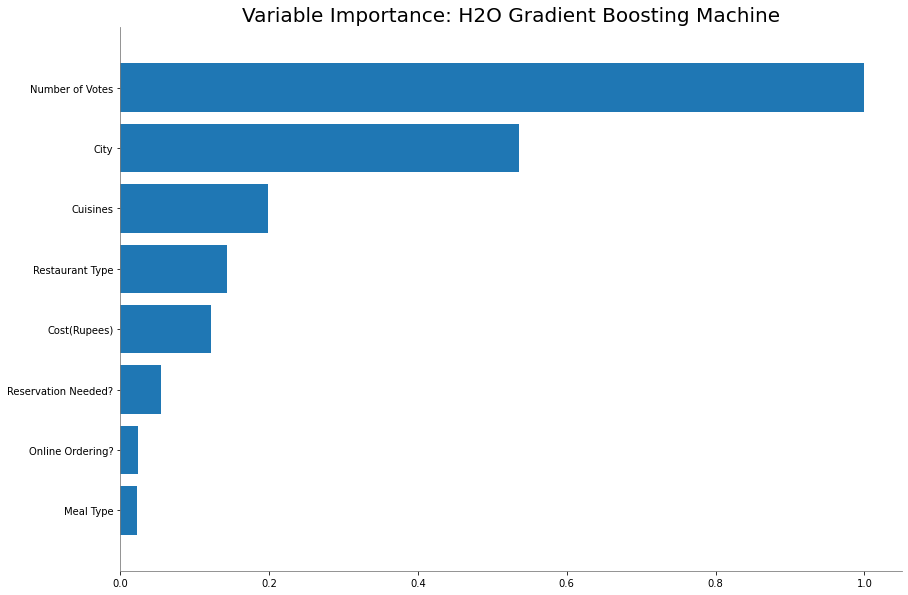

<Figure size 432x288 with 0 Axes>

In [77]:
gbmmodel.varimp_plot()

Based off of the variance importance plot, we see that in the GBM model, Number of Votes and City are the most significant independent variables

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
1. Number of Votes
2. City


**Which hyperparameters are important?**

1. ntrees which is the number of trees to split by
2. learn_rate corresponds to how quickly the error is corrected from each tree to the next and is a simple multiplier 0<LR≤1.

In [78]:
gbmmodel

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20221108_43344


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    160                640                         1.26754e+06            11           15           14.4109       1             139           116.191

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.03204091393293036
RMSE: 0.1789997595890295
LogLoss: 0.12516973403536666
Mean Per-Class Error: 0.03038905978238888
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error      Rate
---  ----  -----  ---  ---------  ------------
156  0     0      0    0          0 / 156
2    5146  495    0    0.0880737  497 / 5,643
1    231   15858  1    0.0144801  233 / 16,091
0    0     8      413  0.0190024  8 / 421
159  5377  16361  414  0.0330779  738 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966922
2    0.999955
3    1
4    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.07394474705827454
RMSE: 0.271927834283794
LogLoss: 0.25185443454481715
Mean Per-Class Error: 0.16747125351238532
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
35   6     9     0    0.3        15 / 50
3    1436  428   0    0.230852   431 / 1,867
1    250   5024  3    0.0481243  254 / 5,278
0    0     12    120  0.0909091  12 / 132
39   1692  5473  123  0.0971748  712 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.902825
2    0.997407
3    0.999591
4    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.08236046696670046
RMSE: 0.2869851337032991
LogLoss: 0.28579051986990583
Mean Per-Class Error: 0.21225252920535875
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error      Rate
---  ----  -----  ---  ---------  --------------
96   17    43     0    0.384615   60 / 156
5    4154  1484   0    0.263867   1,489 / 5,643
8    827   15234  22   0.0532596  857 / 16,091
0    0     62     359  0.147268   62 / 421
109  4998  16823  381  0.110618   2,468 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.889382
2    0.996773
3    0.999507
4    1

Cross-Validation Metrics Summary: 
                         mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.889382   0.00576391  0.894242      0.887718      0.890408      0.880323      0.894218
auc  

**Does regularization help?**

GBM does not have regularization so it is prone to overfitting. To correct this issue, we use XGBoosting that incorporates the regularization formalization in the loss function. As we will see later, regularization does not help the model's performance.

**Does the model make sense?**

Gradient Boosting Machine is an Ensemble Learning method using Boosting to predict models. Per the output, we can understand that Number of Votes and the location (City) can help predict ratings for resturants. This makes sense since places with a lot of people will have a lot of things to say about places and people tend to trust the majority, especially when it comes to food.

###Default Random Forest

In [79]:
drfmodel = h2o.get_model(aml.leaderboard[2,'model_id'])
drfmodel.algo

'drf'

In [80]:
perf = drfmodel.model_performance(test)
perf

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.1528697375243274
RMSE: 0.39098559759194124
LogLoss: 4.00851201403681
Mean Per-Class Error: 0.2814344647435259
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error     Rate
---  ----  ----  ---  --------  -------------
26   8     16    0    0.48      24 / 50
17   1206  641   3    0.354044  661 / 1,867
6    366   4898  8    0.071997  380 / 5,278
0    4     25    103  0.219697  29 / 132
49   1584  5580  114  0.149311  1,094 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.850689
2    0.941313
3    0.94336
4    1

**Are any model assumptions violated?**

No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.


**Which independent variables are significant?**

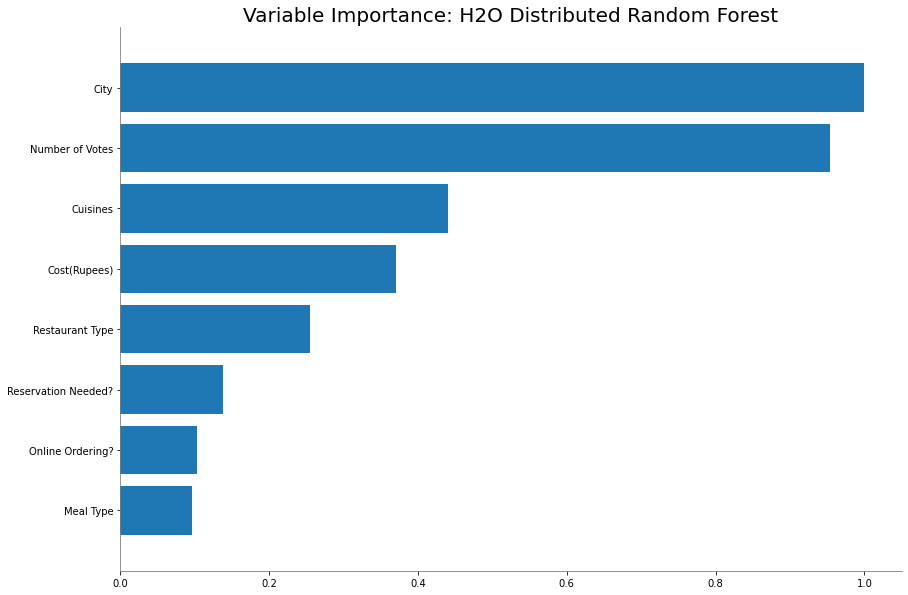

<Figure size 432x288 with 0 Axes>

In [81]:
drfmodel.varimp_plot()

Here we see that Number of Votes and City have highest importance value, therefore they are the most significant variables.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
1. City
2. Number of Votes

**Which hyperparameters are important?**

The most important hyperparameter for DRF models are the number of trees in the model. Higher values lead to overfitting. In our current model, H2O chose the number of trees as 26.

In [82]:
drfmodel

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20221108_43344


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  4                           72568                  15           20           18.75         201           2182          1151.5

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.14877353832029527
RMSE: 0.3857117295601668
LogLoss: 3.83166525003607
Mean Per-Class Error: 0.2800844983551952
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -------------
27   5     22    0    0.5        27 / 54
9    1261  771   1    0.382468   781 / 2,042
12   337   5519  3    0.0599557  352 / 5,871
0    6     23    134  0.177914   29 / 163
48   1609  6335  138  0.146248   1,189 / 8,130

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.853752
2    0.938622
3    0.939606
4    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.1528697375243274
RMSE: 0.39098559759194124
LogLoss: 4.00851201403681
Mean Per-Class Error: 0.2814344647435259
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error     Rate
---  ----  ----  ---  --------  -------------
26   8     16    0    0.48      24 / 50
17   1206  641   3    0.354044  661 / 1,867
6    366   4898  8    0.071997  380 / 5,278
0    4     25    103  0.219697  29 / 132
49   1584  5580  114  0.149311  1,094 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.850689
2    0.941313
3    0.94336
4    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.15178294138193832
RMSE: 0.38959330253732327
LogLoss: 3.6155478610614655
Mean Per-Class Error: 0.367065112284208
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error     Rate
---  ----  -----  ---  --------  --------------
45   24    86     1    0.711538  111 / 156
18   3528  2091   6    0.374801  2,115 / 5,643
32   1147  14876  36   0.075508  1,215 / 16,091
0    22    107    292  0.306413  129 / 421
95   4721  17160  335  0.160011  3,570 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.839989
2    0.943033
3    0.944332
4    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.83999   0.0229292  0.824333      0.821156      0.862169      0.824518      0.867772
auc                      nan  

**Does regularization help?**

Random forest has regularization, it's just not in the form of a penalty to the cost function by greedily maximizing information gain at each split. Accordingly, we see that as the number of trees increase, the residual mean squared error gets lower. 

**Does the model make sense?**

Similar to the GBM results, we see that Number of Votes and City are useful in predicting rating for restaurants in the Zomato app. This makes sense people trust opinions of others. Additionally, places with higher volume of people will tend to have higher quality of restaurants and such will have higher ratings.

###XGBoost

In [83]:
xgbmodel = h2o.get_model(aml.leaderboard[3,'model_id'])
xgbmodel.algo

'xgboost'

In [84]:
perf = xgbmodel.model_performance(test)
perf

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.09672564812256886
RMSE: 0.3110074727760876
LogLoss: 0.31712028545728765
Mean Per-Class Error: 0.353067190721966
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
12   5     33    0    0.76       38 / 50
0    1273  594   0    0.318157   594 / 1,867
0    284   4994  0    0.0538083  284 / 5,278
0    0     37    95   0.280303   37 / 132
12   1562  5658  95   0.130067   953 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.869933
2    0.995223
3    0.999591
4    1

**Are any model assumptions violated?**

*The main assumptions of XGBoost are:*

* *XGBoost may assume that encoded integer values for each input variable have an ordinal relationship*
* *XGBoost assume that your data may not be complete (i.e. it can deal with missing values)*


In our data set, the categorical values that were converted to dummy variables do not have an ordinal relation because the cities, cuisine type, restaurant type, and meal type do not have a ranking. Therefore, our assumption of an ordinal relation is violated.

**Which independent variables are significant?**

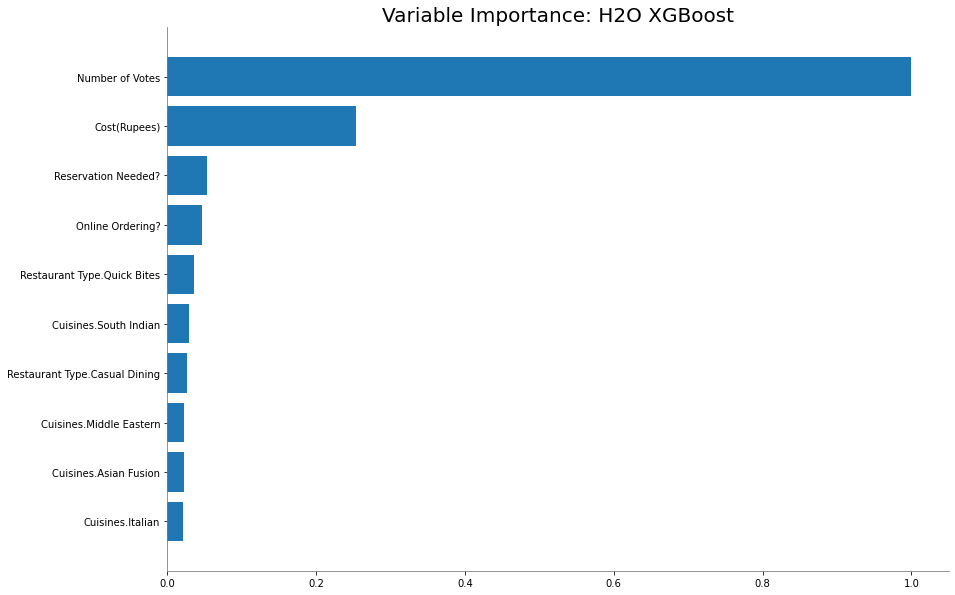

<Figure size 432x288 with 0 Axes>

In [85]:
xgbmodel.varimp_plot()

Based off the variance importance plot, we see that Number of Votes and Cost are the most significant independent variables in a XGBoost model.

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
1. Number of Votes
2. Cost (Rupees)

**Which hyperparameters are important?**

1. ntrees which is the number of trees to split by
2. learn_rate corresponds to how quickly the error is corrected from each tree to the next and is a simple multiplier 0<LR≤1.

In [86]:
xgbmodel

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20221108_43344


Model Summary: 
    number_of_trees
--  -----------------
    83

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.0630267980880602
RMSE: 0.25105138535379606
LogLoss: 0.218611953728291
Mean Per-Class Error: 0.24860461744994172
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error      Rate
---  ----  -----  ---  ---------  --------------
63   16    77     0    0.596154   93 / 156
0    4541  1102   0    0.195286   1,102 / 5,643
2    474   15615  0    0.0295818  476 / 16,091
0    0     73     348  0.173397   73 / 421
65   5031  16867  348  0.0781677  1,744 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.921832
2    0.997356
3    0.99991
4    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.09672564812256886
RMSE: 0.3110074727760876
LogLoss: 0.31712028545728765
Mean Per-Class Error: 0.353067190721966
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4     5    Error      Rate
---  ----  ----  ---  ---------  -----------
12   5     33    0    0.76       38 / 50
0    1273  594   0    0.318157   594 / 1,867
0    284   4994  0    0.0538083  284 / 5,278
0    0     37    95   0.280303   37 / 132
12   1562  5658  95   0.130067   953 / 7,327

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.869933
2    0.995223
3    0.999591
4    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.10558768235458456
RMSE: 0.3249425831659873
LogLoss: 0.34378046586407446
Mean Per-Class Error: 0.4150485032560002
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
2    3     4      5    Error     Rate
---  ----  -----  ---  --------  --------------
19   29    108    0    0.878205  137 / 156
3    3672  1968   0    0.349282  1,971 / 5,643
1    947   15129  14   0.059785  962 / 16,091
0    0     157    264  0.372922  157 / 421
23   4648  17362  278  0.144637  3,227 / 22,311

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.855363
2    0.993994
3    0.999238
4    1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.855363  0.00884327  0.848532      0.85074       0.861273      0.848274      0.867996
auc                      nan       0           nan           nan           nan           nan           nan
err                      0.144637  0.00884327  0.151468      0.14926       0.138727      0.151726      0.132004
err_count                645.4     39.488      676           666           619           677           589
logloss                  0.34378   0.0115916   0.356259      0.350203      0.33712       0.348175  

**Does regularization help?**

XGBoost comes built in with regularization. By comparing XGBoost and GBM, we see that the logloss score for GBM is much lower and therefore a better model for this dataset.

**Does the model make sense?**

Viewing the variance importance plot, we instead see that the Number of Votes and Cost play a big role in predicting ratings by model. This would also make sense because with 5 star restaurants that are really expensive, we would expect high quality food whereas with 1 star restaurants, you would expect the food to be less expensive. 

# Conclusion

From the analysis done above on the data set, we can see that our data is right skewed and as such we did not see any linear models observed in from AutoML. As per our experiment, we saw a variation of decision trees and boosting algorithms. The best model for our data set has been the Gradient Boosting Machine with a logloss score of .28. Some errors in the model can be account by the fact that our dataset violated an assumption of the GBM model because the categorical variables do not have an ordinal relationship. 



# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea
5. https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook
6. H2O.ai Official Documentation

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documnetation** 







